In [4]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


Text(0, 0.5, '# записей')

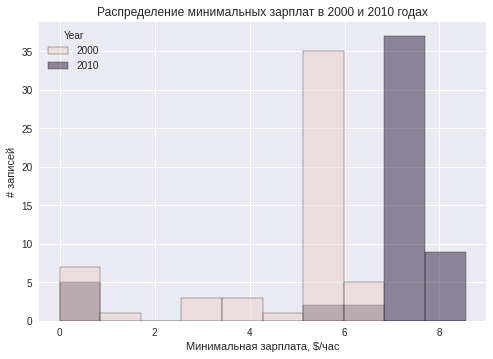

In [6]:
data = df[df['Year'].isin([2000, 2010])]
ax = sns.histplot(data=data, x='Salary', hue='Year')
ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')

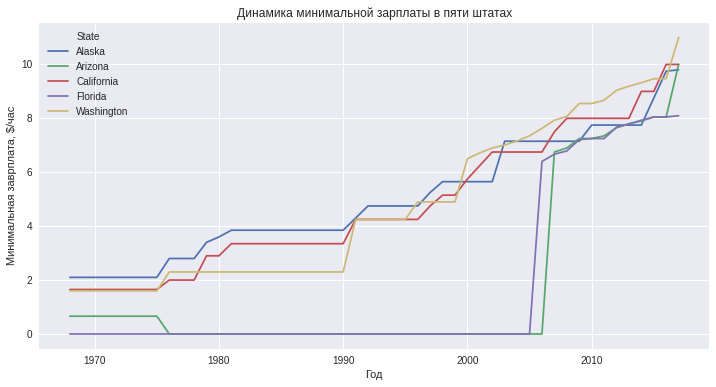

In [7]:
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, x='Year', y='Salary', hue='State', ax=ax)
ax.set_title('Динамика минимальной зарплаты в пяти штатах')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная заврплата, $/час')

plt.show()

In [8]:
data = df[df['Year'].isin([2000])]

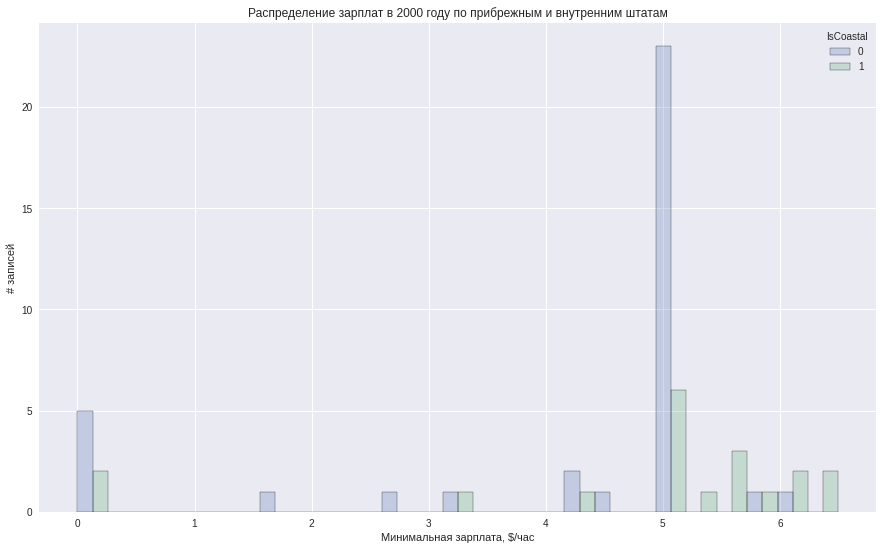

In [12]:
fig, ax = plt.subplots(figsize=(15,9))

sns.histplot(data=data, x='Salary', hue='IsCoastal', ax=ax, alpha=0.25, bins=25, multiple='dodge')

ax.set_title('Распределение зарплат в 2000 году по прибрежным и внутренним штатам')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')

plt.show()

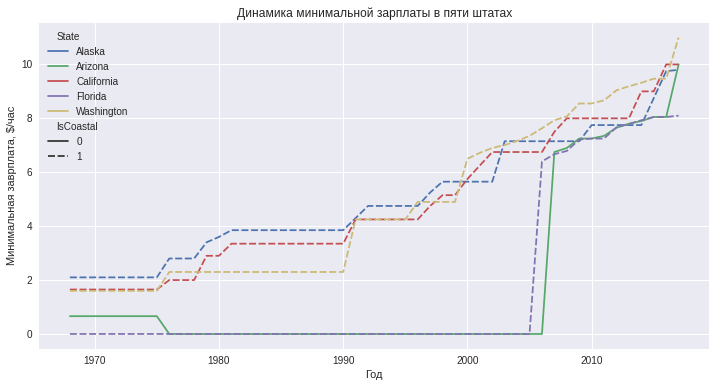

In [14]:
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, x='Year', y='Salary', hue='State', ax=ax, style='IsCoastal')
ax.set_title('Динамика минимальной зарплаты в пяти штатах')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная заврплата, $/час')

plt.show()

In [15]:
df = pd.read_csv('wage-data-coast-with-population.csv')
df.head()

,Year,State,Population,Salary,IsCoastal
0,1969,Alabama,3411770.0,0.00000,0
1,1969,Alaska,294290.0,2.10000,1
2,1969,Arizona,1702945.0,0.66000,0
3,1969,Arkansas,1893768.0,0.15625,0
4,1969,California,19745905.0,1.65000,1


In [19]:
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

df_t = data[data['Year'] == 2017][['State', 'Population']].sort_values('Population')
df_t.loc[:,'Size'] = list(range(1, df_t.shape[0] + 1))
data1 = data.merge(df_t[['State', 'Size']], how='left', on='State')
data1

,Year,State,Population,Salary,IsCoastal,Size
0,1969,Alaska,294290.0,2.10,1,1
1,1969,Arizona,1702945.0,0.66,0,2
2,1969,California,19745905.0,1.65,1,5
3,1969,Florida,6567950.0,0.00,1,4
4,1969,Washington,3392905.0,1.60,1,3
...,...,...,...,...,...,...
240,2017,Alaska,739786.0,9.80,1,1
241,2017,Arizona,7048876.0,10.00,0,2
242,2017,California,39399349.0,10.00,1,5
243,2017,Florida,20976812.0,8.10,1,4


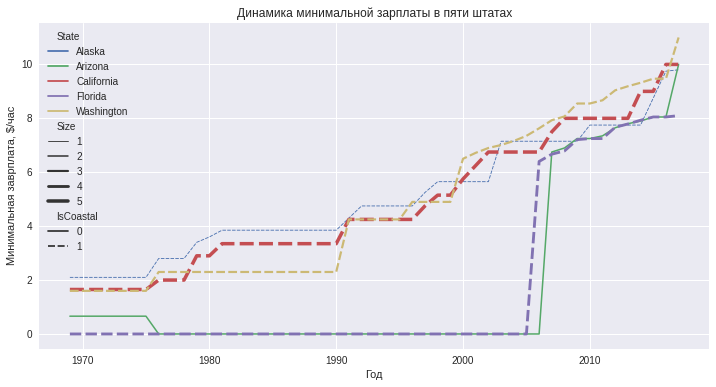

In [20]:
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data1, x='Year', y='Salary', hue='State', ax=ax, style='IsCoastal', size='Size')
ax.set_title('Динамика минимальной зарплаты в пяти штатах')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная заврплата, $/час')

plt.show()

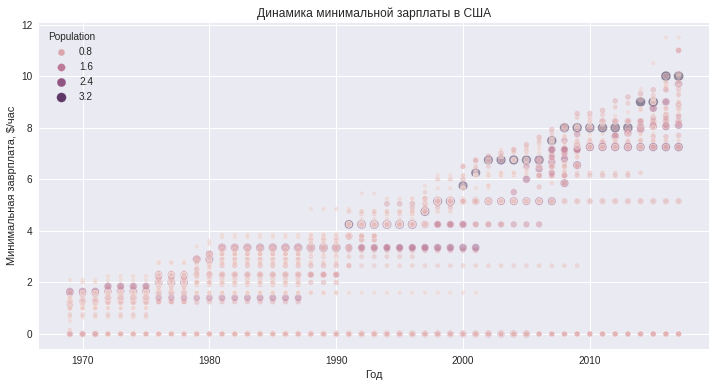

In [25]:
data = df


fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=data, x='Year', y='Salary', ax=ax, hue='Population', alpha=0.5, size='Population')
ax.set_title('Динамика минимальной зарплаты в США')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная заврплата, $/час')

plt.show()

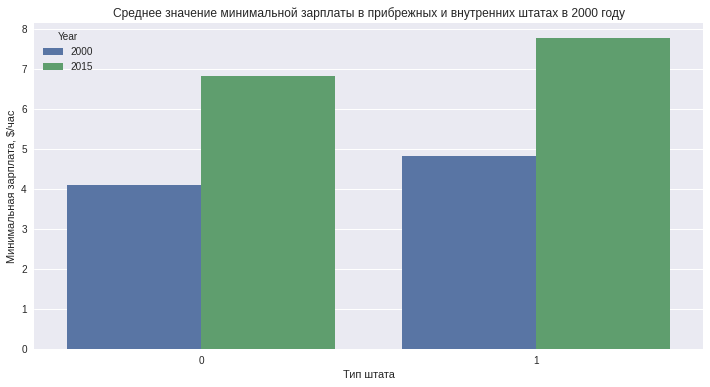

In [28]:
data = df[df['Year'].isin([2000, 2015])]

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=data, x='IsCoastal', y='Salary', ax=ax, ci=None, hue='Year')
ax.set_title('Среднее значение минимальной зарплаты в прибрежных и внутренних штатах в 2000 году')
ax.set_xlabel('Тип штата')
ax.set_ylabel('Минимальная зарплата, $/час')

plt.show()